In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
%load_ext autoreload
%autoreload 2

## Load the Data and plot the number of ratings per movie and user

number of items: 10000, number of users: 1000
shape of dataset: (10000, 1000)


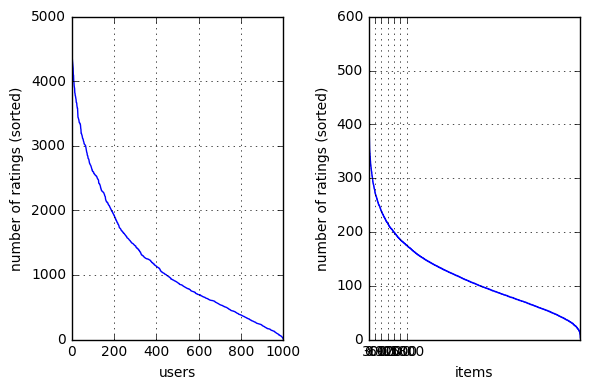

min # of items per user = 8, min # of users per item = 3.


In [6]:
from helpers import load_data, preprocess_data
from plots import plot_raw_data


path_dataset = "../data/data_train.csv"
subset = [100, 101]
#ratings = load_data(path_dataset, subset)
ratings = load_data(path_dataset)
print("shape of dataset:",ratings.shape)
#print(ratings)
#print( ratings[0,9])
#print( ratings[0:5,0:5])
#ratings

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

## Run to estimate model

splitting data
Percentage of nz train data:  0.8998, percentage of nz test data:  0.1002
generating item and user feature matrices
iter: 0, RMSE on training set: 1.1076488530925666.
iter: 0, RMSE on test set: 1.1240790744537086.
iter: 1, RMSE on training set: 1.0722835111522608.
iter: 1, RMSE on test set: 1.0892486575543832.
iter: 2, RMSE on training set: 1.0509444554883742.
iter: 2, RMSE on test set: 1.0683448396237754.
iter: 3, RMSE on training set: 1.0368362509314322.
iter: 3, RMSE on test set: 1.0545632980291657.
iter: 4, RMSE on training set: 1.0270116555127227.
iter: 4, RMSE on test set: 1.0449913818595846.
iter: 5, RMSE on training set: 1.0198937650529136.
iter: 5, RMSE on test set: 1.0380738990697722.
iter: 6, RMSE on training set: 1.0145727531494186.
iter: 6, RMSE on test set: 1.032914987794873.
iter: 7, RMSE on training set: 1.0104927349741795.
iter: 7, RMSE on test set: 1.0289681591323523.
iter: 8, RMSE on training set: 1.0072980674573404.
iter: 8, RMSE on test set: 1.025884

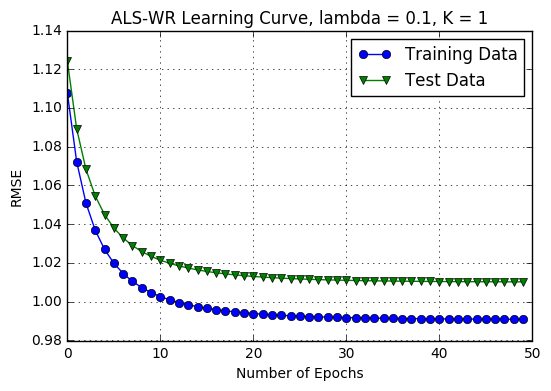

1.00094703309


In [21]:
import our_helpers as ohe
import plots as pl

#defining parameters

lambda_ = 0.1
K = 1
stop_criterion = 1e-5
rng = 50

print("splitting data")
valid_ratings, train, test = ohe.split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings=0, p_test=0.1)
np.random.seed(600)

print("generating item and user feature matrices")
item_features, user_features, train_errors, test_errors = ohe.ALS(
    train, test,K, lambda_, stop_criterion,  rng)

#creating plot
lambda_str = ('%f' % lambda_).rstrip('0')
path = "%s_%d_%d.jpg"%(lambda_str, K, rng)
pl.plot_train_test_errors(train_errors, test_errors, lambda_str , K , path, rng)

#
full_ratings = np.dot( item_features.transpose(), user_features)
nz_rows, nz_cols = test.nonzero()
nz_test = list( zip(nz_rows, nz_cols))

full_ratings_b = ohe.bias_correction(full_ratings, ratings)
print(compute_error2(test, full_ratings_b, nz_test) )


### Create Sumbmissions

In [33]:
from our_helpers import create_submission
path_output = "submission.csv"

create_submission(path_output, full_ratings_b)

number of items: 10000, number of users: 1000


# test ALT